<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/Fine_Tune_squad2_Mistral_Sagemaker_Jumpstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colab-env --quiet
#!pip install ipywidgets==7.0.0 --quiet
!pip install sagemaker boto3 --quiet

#%pip install langchain==0.0.309 --quiet --root-user-action=ignore
%pip install langchain --quiet

In [ ]:
import boto3
import colab_env
import os
import sagemaker
from sagemaker.jumpstart.model import JumpStartModel

In [7]:
import sagemaker
from sagemaker.analytics import TrainingJobAnalytics
import pandas as pd
from sagemaker.jumpstart.estimator import JumpStartEstimator
import boto3
import os

In [ ]:
aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
region=os.getenv("AWS_DEFAULT_REGION")
output=os.getenv("AWS_DEFAULT_OUTPUT")

## Inference (EXAMPLES)

In [ ]:
model_id = "huggingface-llm-mixtral-8x7b"
model_version = "*"

import sagemaker
from sagemaker.jumpstart.model import JumpStartModel

iam_client = boto3.client("iam")

role = iam_client.get_role(
    RoleName=os.getenv("ROLENAME")
)

ROLE_ARN = role['Role']['Arn']

%%time
from sagemaker.jumpstart.model import JumpStartModel

my_model = JumpStartModel(model_id=model_id, model_version=model_version, role=ROLE_ARN, region=region)

predictor = my_model.deploy()

In [ ]:
%%time
prompt = "Tell me about Amazon SageMaker."

payload = {
    "inputs": prompt,
    "parameters": {
        "do_sample": True,
        "top_p": 0.9,
        "temperature": 0.8,
        "max_new_tokens": 1024,
        "stop": ["<|endoftext|>", "</s>"]
    }
}

response = predictor.predict(payload)
print(response[0]["generated_text"])



Amazon SageMaker is a managed service for developers and data scientists to build, train and deploy machine learning models. It removes the heavy lifting from each step of the machine learning process to make it easier to develop high quality models. Amazon SageMaker enables developers and data scientists to easily connect to their data, use popular libraries to explore their data, train and tune models, and then seamlessly deploy these models with a single click.

Why should I consider using Amazon SageMaker?

Building a machine learning model today can be a complex process, requiring many different technologies and tools. Amazon SageMaker has machine learning capabilities built in and is designed to make it easier and faster to build machine learning models. Amazon SageMaker takes care of the heavy lifting required to build, train, and deploy your machine learning models, so you can focus on your business.

How does Amazon SageMaker help me build machine learning models?

Amazon Sa

In [ ]:
def query_endpoint(payload):
    """Query endpoint and print the response"""
    response = predictor.predict(payload)
    print(f"\033[1m Input:\033[0m {payload['inputs']}")
    print(f"\033[1m Output:\033[0m {response[0]['generated_text']}")

In [ ]:
# Code generation
payload = {"inputs": "Write a program to compute factorial in python:", "parameters":{"max_new_tokens": 200}}
query_endpoint(payload)

 Input: Write a program to compute factorial in python:
 Output: 

```
#!/usr/bin/python

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

print(factorial(5))
```

Output:

```
120
```

## Explanation

The factorial of a number is the product of all positive integers less than or equal to that number. For example, the factorial of 5 is 5 * 4 * 3 * 2 * 1, which is 120.

In this program, we define a function called factorial that takes a single argument n. If n is 0, we return 1. Otherwise, we return n multiplied by the factorial of n-1.

We then call the factorial function with the argument 5


In [ ]:
payload = {
    "inputs": "Building a website can be done in 10 simple steps:",
    "parameters":{
        "max_new_tokens": 110,
        "no_repeat_ngram_size": 3
        }
}
query_endpoint(payload)

 Input: Building a website can be done in 10 simple steps:
 Output: 

1. Choose a domain name
2. Choose a web hosting company
3. Choose a website builder
4. Choose a template
5. Add your content
6. Add your images
7. Add your videos
8. Add your social media links
9. Add your contact information
10. Publish your website

## 1. Choose a domain name

The first step in building a website is to choose a domain name. This is the address that people will use to find your website. It should


In [ ]:
# Translation
payload = {
    "inputs": """Translate English to French:

    sea otter => loutre de mer

    peppermint => menthe poivrée

    plush girafe => girafe peluche

    cheese =>""",
    "parameters":{
        "max_new_tokens": 3
    }
}

query_endpoint(payload)

 Input: Translate English to French:

    sea otter => loutre de mer

    peppermint => menthe poivrée

    plush girafe => girafe peluche

    cheese =>
 Output:  fromage



In [ ]:
# Sentiment-analysis
payload = {
    "inputs": """"I hate it when my phone battery dies."
                Sentiment: Negative
                ###
                Tweet: "My day has been :+1:"
                Sentiment: Positive
                ###
                Tweet: "This is the link to the article"
                Sentiment: Neutral
                ###
                Tweet: "This new music video was incredibile"
                Sentiment:""",
    "parameters": {
        "max_new_tokens":2
    }
}
query_endpoint(payload)

 Input: "I hate it when my phone battery dies."
                Sentiment: Negative
                ###
                Tweet: "My day has been :+1:"
                Sentiment: Positive
                ###
                Tweet: "This is the link to the article"
                Sentiment: Neutral
                ###
                Tweet: "This new music video was incredibile"
                Sentiment:
 Output:  Positive


In [ ]:
# Question answering
payload = {
    "inputs": "Could you remind me when was the C programming language invented?",
    "parameters":{
        "max_new_tokens": 50
    }
}
query_endpoint(payload)

 Input: Could you remind me when was the C programming language invented?
 Output: 

C was invented in 1972 by Dennis Ritchie at Bell Labs.

C is a general-purpose programming language. It was invented to write the UNIX operating system.

C is a structured


In [ ]:
# Recipe generation
payload = {"inputs": "What is the recipe for a delicious lemon cheesecake?", "parameters":{"max_new_tokens": 400}}
query_endpoint(payload)

 Input: What is the recipe for a delicious lemon cheesecake?
 Output: 

- Instructions Preheat the oven to 350 degrees Fahrenheit (175 degrees C). In a medium mixing bowl, combine the graham cracker crumbs, 1/4 cup sugar, and melted butter. Mix thoroughly. Bake for 10 minutes in the preheated oven, or until the edges are barely beginning to brown. Allow to cool fully before serving.

## How do you make a cheesecake from scratch?

Ingredients

1. 1 1/2 cups graham cracker crumbs
2. 1/3 cup melted butter
3. 1/4 cup sugar
4. 3 (8 ounce) packages cream cheese
5. 1 cup sugar
6. 3 eggs
7. 1 cup sour cream
8. 1 teaspoon vanilla extract

## How do you make a cheesecake from scratch without a springform pan?

If you don’t have a springform pan, you may use a regular cake pan instead.

1. Prepare the cake pan by lining it with parchment paper.
2. Prepare the cake pan by lining it with parchment paper.
3. Prepare the cake pan by lining it with parchment paper.
4. Prepare the cake pan by lining it

In [ ]:
# Summarization

payload = {
    "inputs":"""Starting today, the state-of-the-art Falcon 40B foundation model from Technology
    Innovation Institute (TII) is available on Amazon SageMaker JumpStart, SageMaker's machine learning (ML) hub
    that offers pre-trained models, built-in algorithms, and pre-built solution templates to help you quickly get
    started with ML. You can deploy and use this Falcon LLM with a few clicks in SageMaker Studio or
    programmatically through the SageMaker Python SDK.
    Falcon 40B is a 40-billion-parameter large language model (LLM) available under the Apache 2.0 license that
    ranked #1 in Hugging Face Open LLM leaderboard, which tracks, ranks, and evaluates LLMs across multiple
    benchmarks to identify top performing models. Since its release in May 2023, Falcon 40B has demonstrated
    exceptional performance without specialized fine-tuning. To make it easier for customers to access this
    state-of-the-art model, AWS has made Falcon 40B available to customers via Amazon SageMaker JumpStart.
    Now customers can quickly and easily deploy their own Falcon 40B model and customize it to fit their specific
    needs for applications such as translation, question answering, and summarizing information.
    Falcon 40B are generally available today through Amazon SageMaker JumpStart in US East (Ohio),
    US East (N. Virginia), US West (Oregon), Asia Pacific (Tokyo), Asia Pacific (Seoul), Asia Pacific (Mumbai),
    Europe (London), Europe (Frankfurt), Europe (Ireland), and Canada (Central),
    with availability in additional AWS Regions coming soon. To learn how to use this new feature,
    please see SageMaker JumpStart documentation, the Introduction to SageMaker JumpStart –
    Text Generation with Falcon LLMs example notebook, and the blog Technology Innovation Institute trainsthe
    state-of-the-art Falcon LLM 40B foundation model on Amazon SageMaker. Summarize the article above:""",
    "parameters":{
        "max_new_tokens":200
        }
    }
query_endpoint(payload)

 Input: Starting today, the state-of-the-art Falcon 40B foundation model from Technology
    Innovation Institute (TII) is available on Amazon SageMaker JumpStart, SageMaker's machine learning (ML) hub
    that offers pre-trained models, built-in algorithms, and pre-built solution templates to help you quickly get
    started with ML. You can deploy and use this Falcon LLM with a few clicks in SageMaker Studio or
    programmatically through the SageMaker Python SDK.
    Falcon 40B is a 40-billion-parameter large language model (LLM) available under the Apache 2.0 license that
    ranked #1 in Hugging Face Open LLM leaderboard, which tracks, ranks, and evaluates LLMs across multiple
    benchmarks to identify top performing models. Since its release in May 2023, Falcon 40B has demonstrated
    exceptional performance without specialized fine-tuning. To make it easier for customers to access this
    state-of-the-art model, AWS has made Falcon 40B available to customers via Amazon SageM

## Preparing training data
We will use a subset of SQuAD2.0 for supervised fine-tuning. This dataset contains questions posed by human annotators on a set of Wikipedia articles. In addition to questions with answers, SQuAD2.0 contains about 50k unanswerable questions. Such questions are plausible, but cannot be directly answered from the articles' content. We only use unanswerable questions for our task.

Citation: @article{rajpurkar2018know, title={Know what you don't know: Unanswerable questions for SQuAD}, author={Rajpurkar, Pranav and Jia, Robin and Liang, Percy}, journal={arXiv preprint arXiv:1806.03822}, year={2018} }

License: Creative Commons Attribution-ShareAlike License (CC BY-SA 4.0)

In [81]:
import colab_env
import boto3
import os
import sagemaker
from sagemaker.jumpstart.model import JumpStartModel

iam = boto3.client("iam")

role = iam.get_role(
    RoleName=os.getenv("ROLENAME")
)

ROLE_ARN = role['Role']['Arn']

In [ ]:
sess = sagemaker.Session()
sagemaker_session_bucket=None
sess = sagemaker.Session(default_bucket=sagemaker_session_bucket)

print(f"sagemaker role arn: {role}")
print(f"sagemaker bucket: {sess.default_bucket()}")
print(f"sagemaker session region: {sess.boto_region_name}")

In [ ]:
import boto3
import sagemaker
import json

# Get current region, role, and default bucket
aws_region = boto3.Session().region_name
aws_role = sagemaker.session.Session().get_caller_identity_arn()
output_bucket = sagemaker.Session().default_bucket()

# This will be useful for printing
newline, bold, unbold = "\n", "\033[1m", "\033[0m"

print(f"{bold}aws_region:{unbold} {aws_region}")
print(f"{bold}aws_role:{unbold} {aws_role}")
print(f"{bold}output_bucket:{unbold} {output_bucket}")

In [ ]:
import boto3
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths and bucket name
local_file_path = '/content/drive/MyDrive/datasets/train-v2.0.json'
import sagemaker
sess = sagemaker.Session()
bucket_name = sess.default_bucket() # Using the SageMaker session's default bucket
s3_file_key = 'train-v2.0.json'  # Desired name in S3

# Create S3 client
s3 = boto3.client('s3')

# Upload the file
try:
    s3.upload_file(local_file_path, bucket_name, s3_file_key)
    print(f"File '{local_file_path}' uploaded to s3://{bucket_name}/{s3_file_key}")
except Exception as e:
    print(f"Error uploading file: {e}")

In [ ]:
from sagemaker.s3 import S3Downloader

original_data_file = "train-v2.0.json"

# The data was mirrored in the following bucket
original_data_location = (
    f"s3://{sess.default_bucket()}/{original_data_file}"
)

print(original_data_location)


S3Downloader.download(original_data_location, ".")

In [76]:
import json
template = {
    "prompt": "Ask a question which is related to the following text, but cannot be answered based on the text. Text: {context}",
    "completion": "{question}",
}

with open("template.json", "w") as f:
    json.dump(template, f)

In [77]:
local_data_file = "task-data.jsonl"  # any name with .jsonl extension

with open(original_data_file) as f:
    data = json.load(f)

def preprocess_data(local_data_file, data, num_maximum_example):
    num_example_idx = 0
    with open(local_data_file, "w") as f:
        for article in data["data"]:
            for paragraph in article["paragraphs"]:
                # iterate over questions for a given paragraph
                for qas in paragraph["qas"]:
                    if qas["is_impossible"]:
                        # the question is relevant, but cannot be answered
                        example = {"context": paragraph["context"], "question": qas["question"]}
                        json.dump(example, f)
                        f.write("\n")
                        num_example_idx += 1
                        if num_example_idx >= num_maximum_example:
                            return

preprocess_data(local_data_file=local_data_file, data=data, num_maximum_example=10000)

In [ ]:
import sagemaker

sess = sagemaker.Session()
output_bucket = sess.default_bucket()

bold = "\033[1m"
unbold = "\033[0m"

from sagemaker.s3 import S3Uploader

training_dataset_s3_path = f"s3://{output_bucket}/train_data"
S3Uploader.upload(local_data_file, training_dataset_s3_path)
S3Uploader.upload("template.json", training_dataset_s3_path)
print(f"{bold}training data:{unbold} {training_dataset_s3_path}")

## Prepare training parameters

In [ ]:
import colab_env
import os

bold = "\033[1m"
unbold = "\033[0m"


aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
region=os.getenv("AWS_DEFAULT_REGION")
output=os.getenv("AWS_DEFAULT_OUTPUT")

print(f"{bold}aws_access_key_id:{unbold} {aws_access_key_id}")
print(f"{bold}aws_secret_access_key:{unbold} {aws_secret_access_key}")
print(f"{bold}region:{unbold} {region}")
print(f"{bold}output:{unbold} {output}")

from sagemaker import hyperparameters


model_id = 'huggingface-llm-mixtral-8x7b'
model_version = '1.18.2'

my_hyperparameters = hyperparameters.retrieve_default(model_id=model_id, model_version=model_version)
print(my_hyperparameters)

Overwrite the hyperparameters

In [ ]:
my_hyperparameters["epoch"] = "2"
my_hyperparameters["per_device_train_batch_size"] = "2"
my_hyperparameters["gradient_accumulation_steps"] = "2"
my_hyperparameters["instruction_tuned"] = "True"
print(my_hyperparameters)

Validate hyperparameters

In [5]:
hyperparameters.validate(model_id=model_id, model_version=model_version, hyperparameters=my_hyperparameters)

## Starting training

Note. The parameter `load_best_model_at_end` (Whether or not to load the best model found during training at the end of training. When this option is enabled, the best checkpoint will always be saved) is set as "True" by default. During loading the best model checkpoints at the end of training (HuggingFace will load the best model checkpoints before saving it), there is overhead of memory usage which can lead to Out-Of-Memory error.

If setting `load_best_model_at_end`, we recommend to use `ml.g5.48xlarge`; if not, we recommend to use `ml.g5.12xlarge`.

In [ ]:
from sagemaker.jumpstart.estimator import JumpStartEstimator

instruction_tuned_estimator = JumpStartEstimator(
    model_id=model_id,
    hyperparameters=my_hyperparameters,
    #instance_type="ml.g5.48xlarge",
    instance_type="ml.g5.12xlarge",
    role=ROLE_ARN,
)
instruction_tuned_estimator.fit(
    {"train": training_dataset_s3_path}, logs=True
)

Extract Training performance metrics. Performance metrics such as training loss and validation accuracy/loss can be accessed through cloudwatch while the training. We can also fetch these metrics and analyze them within the notebook.

### Deploying inference endpoints

In [ ]:
instruction_tuned_predictor = instruction_tuned_estimator.deploy()

### Running inference queries and compare model performances

We examine three examples as listed in variable `test_paragraphs`. The prompt as defined in variable `prompt` asks the model to ask a question based on the context and make sure the question **cannot** be answered from the context.


In [ ]:
prompt = "Ask a question which is related to the following text, but cannot be answered based on the text. Text: {context}"

# Sources: Wikipedia, AWS Documentation
test_paragraphs = [
    """
Adelaide is the capital city of South Australia, the state's largest city and the fifth-most populous city in Australia. "Adelaide" may refer to either Greater Adelaide (including the Adelaide Hills) or the Adelaide city centre. The demonym Adelaidean is used to denote the city and the residents of Adelaide. The Traditional Owners of the Adelaide region are the Kaurna people. The area of the city centre and surrounding parklands is called Tarndanya in the Kaurna language.
Adelaide is situated on the Adelaide Plains north of the Fleurieu Peninsula, between the Gulf St Vincent in the west and the Mount Lofty Ranges in the east. Its metropolitan area extends 20 km (12 mi) from the coast to the foothills of the Mount Lofty Ranges, and stretches 96 km (60 mi) from Gawler in the north to Sellicks Beach in the south.
""",
    """
Amazon Elastic Block Store (Amazon EBS) provides block level storage volumes for use with EC2 instances. EBS volumes behave like raw, unformatted block devices. You can mount these volumes as devices on your instances. EBS volumes that are attached to an instance are exposed as storage volumes that persist independently from the life of the instance. You can create a file system on top of these volumes, or use them in any way you would use a block device (such as a hard drive). You can dynamically change the configuration of a volume attached to an instance.
We recommend Amazon EBS for data that must be quickly accessible and requires long-term persistence. EBS volumes are particularly well-suited for use as the primary storage for file systems, databases, or for any applications that require fine granular updates and access to raw, unformatted, block-level storage. Amazon EBS is well suited to both database-style applications that rely on random reads and writes, and to throughput-intensive applications that perform long, continuous reads and writes.
""",
    """
Amazon Comprehend uses natural language processing (NLP) to extract insights about the content of documents. It develops insights by recognizing the entities, key phrases, language, sentiments, and other common elements in a document. Use Amazon Comprehend to create new products based on understanding the structure of documents. For example, using Amazon Comprehend you can search social networking feeds for mentions of products or scan an entire document repository for key phrases.
You can access Amazon Comprehend document analysis capabilities using the Amazon Comprehend console or using the Amazon Comprehend APIs. You can run real-time analysis for small workloads or you can start asynchronous analysis jobs for large document sets. You can use the pre-trained models that Amazon Comprehend provides, or you can train your own custom models for classification and entity recognition.
All of the Amazon Comprehend features accept UTF-8 text documents as the input. In addition, custom classification and custom entity recognition accept image files, PDF files, and Word files as input.
Amazon Comprehend can examine and analyze documents in a variety of languages, depending on the specific feature. For more information, see Languages supported in Amazon Comprehend. Amazon Comprehend's Dominant language capability can examine documents and determine the dominant language for a far wider selection of languages.
""",
]

In [ ]:
parameters = {
    "max_new_tokens": 50,
    "do_sample": True,
    "top_k": 50,
    "top_p": 0.8,
    "do_sample": True,
    "temperature": 0.01,
}

def query_endpoint_with_json_payload(encoded_json, endpoint_name):
    client = boto3.client("runtime.sagemaker")
    response = client.invoke_endpoint(
        EndpointName=endpoint_name, ContentType="application/json", Body=encoded_json
    )
    return response

def parse_response(query_response):
    model_predictions = json.loads(query_response["Body"].read())
    return model_predictions[0]["generated_text"]

def generate_question(endpoint_name, text):
    expanded_prompt = prompt.replace("{context}", text)
    payload = {"inputs": expanded_prompt, "parameters": parameters}
    query_response = query_endpoint_with_json_payload(json.dumps(payload).encode("utf-8"), endpoint_name=endpoint_name)
    generated_texts = parse_response(query_response)
    print(f"Response: {generated_texts}{newline}")

In [ ]:
print(f"{bold}Prompt:{unbold} {repr(prompt)}")
for paragraph in test_paragraphs:
    print("-" * 80)
    print(paragraph)
    print("-" * 80)
    print(f"{bold}pre-trained{unbold}")
    generate_question(predictor.endpoint_name, paragraph)
    print(f"{bold}fine-tuned{unbold}")
    generate_question(instruction_tuned_predictor.endpoint_name, paragraph)

## ANALYTICS

In [2]:
!pip show sagemaker boto3

Name: sagemaker
Version: 2.243.0
Summary: Open source library for training and deploying models on Amazon SageMaker.
Home-page: https://github.com/aws/sagemaker-python-sdk
Author: Amazon Web Services
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: attrs, boto3, cloudpickle, docker, fastapi, google-pasta, importlib-metadata, jsonschema, numpy, omegaconf, packaging, pandas, pathos, platformdirs, protobuf, psutil, pyyaml, requests, sagemaker-core, schema, smdebug-rulesconfig, tblib, tqdm, urllib3, uvicorn
Required-by: 
---
Name: boto3
Version: 1.37.29
Summary: The AWS SDK for Python
Home-page: https://github.com/boto/boto3
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: botocore, jmespath, s3transfer
Required-by: sagemaker, sagemaker-core


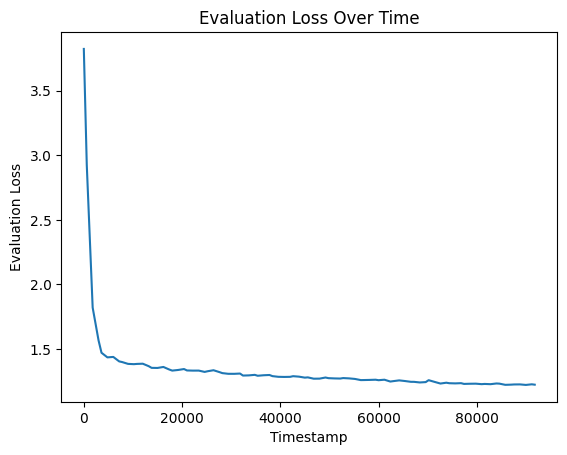

In [72]:
import sagemaker
from sagemaker.analytics import TrainingJobAnalytics
import pandas as pd
import matplotlib.pyplot as plt

def analyze_eval_loss_and_plot(training_job_name, eval_loss_metric_name='huggingface-textgeneration:eval-loss', period=300):
    """
    Fetches and plots evaluation loss from a SageMaker training job.

    Args:
        training_job_name (str): The name of the training job.
        eval_loss_metric_name (str, optional): The name of the evaluation loss metric. Defaults to 'huggingface-textgeneration:eval-loss'.
        period (int, optional): The granularity of data retrieval in seconds. Defaults to 300 (5 minutes).
    """
    try:
        # Get the evaluation loss metric
        analyzer = TrainingJobAnalytics(training_job_name=training_job_name,
                                        metric_names=[eval_loss_metric_name],
                                        period=period)
        df = analyzer.dataframe()

        if df.empty:
            print(f"Warning: No data found for metric '{eval_loss_metric_name}'.")
            return

        # Plotting the evaluation loss over time
        plt.plot(df['timestamp'], df['value'])
        plt.xlabel('Timestamp')
        plt.ylabel('Evaluation Loss')
        plt.title('Evaluation Loss Over Time')
        plt.show()

    except Exception as e:
        print(f"Error analyzing training job: {e}")
        return

# --- Usage with existing training job name ---

training_job_name = 'hf-llm-mixtral-8x7b-2025-04-07-11-38-09-597'

analyze_eval_loss_and_plot(training_job_name, period=600)

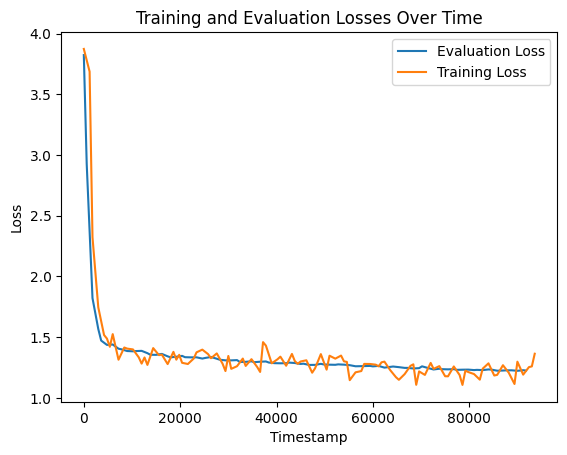

In [71]:
import sagemaker
from sagemaker.analytics import TrainingJobAnalytics
import pandas as pd
import matplotlib.pyplot as plt

def analyze_training_job_losses(training_job_name, eval_loss_metric_name='huggingface-textgeneration:eval-loss', train_loss_metric_name='huggingface-textgeneration:train-loss', period=300):
    """
    Fetches and plots training and evaluation losses from a SageMaker training job.

    Args:
        training_job_name (str): The name of the training job.
        eval_loss_metric_name (str, optional): The name of the evaluation loss metric. Defaults to 'huggingface-textgeneration:eval-loss'.
        train_loss_metric_name (str, optional): The name of the training loss metric. Defaults to 'huggingface-textgeneration:train-loss'.
        period (int, optional): The granularity of data retrieval in seconds. Defaults to 300 (5 minutes).
    """
    try:
        # Get the evaluation loss metric
        eval_analyzer = TrainingJobAnalytics(training_job_name=training_job_name,
                                            metric_names=[eval_loss_metric_name],
                                            period=period)
        eval_df = eval_analyzer.dataframe()

        # Get the training loss metric
        train_analyzer = TrainingJobAnalytics(training_job_name=training_job_name,
                                            metric_names=[train_loss_metric_name],
                                            period=period)
        train_df = train_analyzer.dataframe()

        if eval_df.empty:
            print(f"Warning: No data found for metric '{eval_loss_metric_name}'.")
        if train_df.empty:
            print(f"Warning: No data found for metric '{train_loss_metric_name}'.")
        if eval_df.empty or train_df.empty:
            return

        # Plotting the losses over time
        plt.plot(eval_df['timestamp'], eval_df['value'], label='Evaluation Loss')
        plt.plot(train_df['timestamp'], train_df['value'], label='Training Loss')
        plt.xlabel('Timestamp')
        plt.ylabel('Loss')
        plt.title('Training and Evaluation Losses Over Time')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error analyzing training job: {e}")
        return

# --- Usage ---
analyze_training_job_losses('hf-llm-mixtral-8x7b-2025-04-07-11-38-09-597', period=600)

In [55]:
import warnings
import sagemaker.analytics

# Suppress warnings (use with caution)
warnings.filterwarnings("ignore")

In [69]:
import sagemaker
from sagemaker.analytics import TrainingJobAnalytics
import pandas as pd
import boto3

def analyze_training_job_metrics(training_job_name, metrics_to_analyze=None, period=300):
    """
    Fetches and analyzes metrics from a SageMaker training job,
    specifically tailored for Hugging Face training jobs, while avoiding warnings.
    Prints the first 5 rows for all requested metrics, even if unavailable.
    Instead of warnings, it prints an empty DataFrame or a "No data found" message.
    Automatically tries to find the correct metric names for 'loss' and 'accuracy'.

    Args:
        training_job_name (str): The name of the SageMaker training job.
        metrics_to_analyze (list, optional): A list of specific metric names to retrieve.
                                             If None, all available metrics are fetched.
                                             Defaults to None.
        period (int, optional): The granularity of data retrieval in seconds. Defaults to 300 (5 minutes).

    Returns:
        pandas.DataFrame: A DataFrame containing the training job metrics, or None
                          if there's an error or no relevant data is found.
    """
    try:
        # Get training job duration
        client = boto3.client('sagemaker')
        response = client.describe_training_job(TrainingJobName=training_job_name)
        training_job_duration = response['TrainingTimeInSeconds']

        # Calculate total periods (estimated) and adjust period if necessary
        total_periods = int(training_job_duration / period)
        if total_periods > 1440:  # CloudWatch limit
            period = int(training_job_duration / 1440) + 1  # Adjust period to stay within limit
            print(f"Adjusted period to {period} seconds to stay within CloudWatch limit.")

        # Get available metrics from CloudWatch
        analyzer = TrainingJobAnalytics(training_job_name=training_job_name, period=period)
        available_metrics = analyzer.dataframe()['metric_name'].unique()

        # Mapping metrics_of_interest to likely CloudWatch metric names
        metric_mapping = {
            'loss': 'huggingface-training:loss',
            'accuracy': 'huggingface-textgeneration:eval-accuracy',
            'validation_loss': 'huggingface-textgeneration:eval-loss'
        }

        printed_metrics = set()  # Keep track of printed metrics

        # Print first 5 rows for each requested metric
        if metrics_to_analyze:
            for metric in metrics_to_analyze:
                cloudwatch_metric = metric_mapping.get(metric, metric)

                if cloudwatch_metric in available_metrics:
                    analyzer = TrainingJobAnalytics(training_job_name=training_job_name, metric_names=[cloudwatch_metric], period=period)
                    df = analyzer.dataframe()
                    print(f"First 5 rows for '{metric}':")
                    print(df.head())
                    printed_metrics.add(cloudwatch_metric)
                else:
                    # Try to find the correct metric name, but avoid 'eval-loss' if looking for 'loss'
                    found_metric = None
                    for available_metric in available_metrics:
                        if metric in available_metric.lower() and (metric != 'loss' or 'eval-loss' not in available_metric.lower()):
                            found_metric = available_metric
                            break

                    if found_metric:
                        analyzer = TrainingJobAnalytics(training_job_name=training_job_name, metric_names=[found_metric], period=period)
                        df = analyzer.dataframe()
                        print(f"First 5 rows for '{metric}' (found as '{found_metric}'):")
                        print(df.head())
                        printed_metrics.add(found_metric)
                    else:
                        # Handle the case where 'accuracy' is not found
                        if metric == 'accuracy':
                            print("Warning: 'accuracy' metric not found in training job logs.")
                        else:
                            print(f"First 5 rows for '{metric}':")
                            print(pd.DataFrame(columns=['timestamp', 'metric_name', 'value']).head())

        else:
            # If metrics_to_analyze is None, print first 5 rows for all available metrics,
            # excluding those already printed
            for metric_name in available_metrics:
                if metric_name in printed_metrics:
                    continue  # Skip if already printed

                analyzer = TrainingJobAnalytics(training_job_name=training_job_name, metric_names=[metric_name], period=period)
                df = analyzer.dataframe()
                print(f"First 5 rows for '{metric_name}':")
                print(df.head())
                printed_metrics.add(metric_name)  # Mark as printed

        # --- Retrieving requested metrics for analysis, excluding already printed ---
        if metrics_to_analyze:
            cloudwatch_metrics = [metric_mapping.get(metric, metric) for metric in metrics_to_analyze
                                 if metric_mapping.get(metric, metric) not in printed_metrics]

            # Add found metrics to cloudwatch_metrics
            for metric in metrics_to_analyze:
                if metric_mapping.get(metric, metric) not in printed_metrics:
                    for available_metric in available_metrics:
                        if metric in available_metric.lower() and available_metric not in printed_metrics:
                            cloudwatch_metrics.append(available_metric)
                            break
        else:
            cloudwatch_metrics = list(set(available_metrics) - printed_metrics)

        # Filter cloudwatch_metrics to include only available metrics
        cloudwatch_metrics = [metric for metric in cloudwatch_metrics if metric in available_metrics]

        # Get the training job analytics with filtered metrics
        if cloudwatch_metrics:  # Only proceed if there are metrics to retrieve
            analyzer = TrainingJobAnalytics(training_job_name=training_job_name, metric_names=cloudwatch_metrics, period=period)
            df = analyzer.dataframe()

            # Check if DataFrame is empty (no data found for any of the requested metrics)
            if df.empty:
                print(f"Warning: No data found for the requested metrics in training job: {training_job_name}")
                return None  # Return None if no data is found

            # Print available metrics
            print(f"Available metrics: {available_metrics}")

            # Basic Data Inspection (Adapt as needed)
            print(f"Successfully retrieved metrics for job: {training_job_name}")
            print("First 5 rows of the data:")
            print(df.head())
            print("\nColumn information:")
            print(df.info())

            return df
        else:
            # This warning should no longer be triggered if 'accuracy' is the only missing metric
            # print(f"Warning: None of the requested metrics were found in training job: {training_job_name}")
            return None  # Return None if no metrics are found

    except Exception as e:
        print(f"Error analyzing training job: {e}")
        return None

In [70]:
# --- Example Usage ---
training_job_name = 'hf-llm-mixtral-8x7b-2025-04-07-11-38-09-597'  # Replace with your actual training job name
metrics_of_interest = ['loss', 'accuracy', 'validation_loss']

metrics_df = analyze_training_job_metrics(training_job_name, metrics_of_interest)

First 5 rows for 'loss' (found as 'huggingface-textgeneration:train-loss'):
   timestamp                            metric_name     value
0        0.0  huggingface-textgeneration:train-loss  3.851300
1      300.0  huggingface-textgeneration:train-loss  3.896100
2     1200.0  huggingface-textgeneration:train-loss  3.686733
3     2100.0  huggingface-textgeneration:train-loss  2.322350
4     3300.0  huggingface-textgeneration:train-loss  1.745600
First 5 rows for 'validation_loss':
   timestamp                           metric_name     value
0        0.0  huggingface-textgeneration:eval-loss  3.822963
1      900.0  huggingface-textgeneration:eval-loss  2.925611
2     1800.0  huggingface-textgeneration:eval-loss  1.821143
3     3000.0  huggingface-textgeneration:eval-loss  1.567121
4     3900.0  huggingface-textgeneration:eval-loss  1.471705


## Clean up the endpoint

In [6]:
#  Frank Morales created this cell on December 14, 2023; it fully allows automatically the deletion of endpoints, models, and endpoint configurations.

import colab_env
import os

aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
aws_region=os.getenv("AWS_DEFAULT_REGION")
aws_output=os.getenv("AWS_DEFAULT_OUTPUT")

import boto3

sagemaker_client = boto3.client('sagemaker', region_name=aws_region)

def cleanup_sagemaker_resources(resource_name,resourceid):

    if resourceid==0:
       response=sagemaker_client.list_endpoints()
    elif resourceid==1:
         response=sagemaker_client.list_models()
    elif resourceid==2:
         response=sagemaker_client.list_endpoint_configs()

    print(resource_name)

    number_of_endpoints=len(response['%s'%resource_name])
    for i in range(number_of_endpoints):
        resource_nametmp='%s'%resource_name[0:len(resource_name)-1]
        print('%sName'%resource_nametmp)
        print(response['%s'%resource_name][i]['%sName'%resource_nametmp])

        if resourceid==0:
           endpoint_name=response['%s'%resource_name][i]['%sName'%resource_nametmp]
           sagemaker_client.delete_endpoint(EndpointName=endpoint_name)
        elif resourceid==1:
           sagemaker_client.delete_model(ModelName=response['Models'][i]['ModelName'])
        elif resourceid==2:
           sagemaker_client.delete_endpoint_config(EndpointConfigName=response['EndpointConfigs'][i]['EndpointConfigName'])

    print("\n==================================\n")


cleanup_sagemaker_resources('Endpoints',0)
cleanup_sagemaker_resources('Models',1)
cleanup_sagemaker_resources('EndpointConfigs',2)

Endpoints
EndpointName
hf-llm-mixtral-8x7b-2025-04-07-11-30-56-131


Models
ModelName
meta-vlm-llama-4-scout-17b-16e-instruct-2025-04-08-01-57-15-785
ModelName
hf-llm-mixtral-8x7b-2025-04-07-11-30-56-130


EndpointConfigs
EndpointConfigName
meta-vlm-llama-4-scout-17b-16e-instruct-2025-04-08-01-57-15-787
EndpointConfigName
hf-llm-mixtral-8x7b-2025-04-07-11-30-56-131




In [ ]:
# Delete the SageMaker endpoint
predictor.delete_model()
predictor.delete_endpoint()
instruction_tuned_predictor.delete_model()
instruction_tuned_predictor.delete_endpoint()